<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Introduction to Computation for the Social Sciences</h1>
<h2 style="margin-top: 0.7em; margin-bottom: 0.3em;">Assignment 3</h2>
<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Deadline: 22.12.2024 12:00 pm</h3>

</div>
<br>

<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">
Please push your solutions to your personal repository in our <a href='https://classroom.github.com/a/tGD_7t85'>GitHub Classroom</a></h4><br>

***

This assignment will test your knowledge in object oriented programming (OOP), your understanding of regular expressions (regexes), and finally we will have you perform sentiment analysis.<br>
As always: In case of questions feel free to reach out to us tutors in person, via mail, or over discord.<br>
***Important: Submit a solution for every single task and do not skip any of them. Even if your solution is not perfect or doesn't work you might still receive some points that way!***


***

In [1]:
# i only pushed the manually_labeled_tweets to github, since the preprocessed tweets are even in zip file to large for github. In addition to
# that i heard there is still some confusion if it should be uploaded or not, so I decide for me to not upload it

# my code is written in a way that it is no problem to run it without these json files and they will be created in the process of running the code

In [2]:
# Import the modules you use throughout the assignment here (this is called a setup chunk/cell)

import pandas as pd
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import tkinter as tk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud


# Part 1 - Object Oriented Programming

## Task 1.1


The [Dog API](https://dogapi.dog/docs/api-v2) is a simple and easy to use tool to get information about certain dog breeds along with random facts about dogs.<br>
Use the API to create a class `DogBreed`.
- This class takes as input the name of a dog breed (e.g. 'Caucasian Shepherd Dog' or 'Bouvier des Flandres')
- Implement a class method `get_breed_info()`that returns a description of input dog breed
- Implement a class method `get_max_age()`that returns the maximum life expectancy of the input dog breed
- Implement a class method `get_fact()`that returns a random fact about dogs

In [3]:
# creating a list with all the dogs from the dog api in it
# i first create one list, so there is no need to always acces the api in the class
dogs = []
for page in range(1,30):
    dog = requests.get(f"https://dogapi.dog/api/v2/breeds?page[number]={page}").json()
    dogs.extend(dog["data"])

In [4]:
# class to acces the dogs which are stored in the list for better runtime
class DogBreed:
    """
    Class DogBreed

    Parameters:
    ----------
    name: name of the dog breed in a string

    Methods:
    -------
    get_breed_info: gives a description of the dog

    get_max_age: gets the maximum age for this dog

    get_fact: gives a random fun fact about dogs
    
    """

    def __init__(self,name):
        self.name = name
    
    def get_breed_info(self):
        for d in dogs:
            if d["attributes"]["name"] == self.name:
                return d["attributes"]["description"]
            
    def get_max_age(self):
        for d in dogs:
            if d["attributes"]["name"] == self.name:
                return d["attributes"]["life"]["max"]
        
    def get_fact(self):
        facts = requests.get("https://dogapi.dog/api/v2/facts").json()
        return facts["data"][0]["attributes"]["body"]


In [5]:
#testing the class
dog1 = DogBreed(name="Golden Retriever").get_breed_info()
dog1

'The Golden Retriever is a large and muscular breed of dog that was originally bred in Scotland for retrieving game. They are intelligent, friendly, and eager to please, and make excellent family pets.'

## Task 1.2 - Bonus


The class `DogBreed` you created in task 1.1 is probably pretty simple. To remedy this, please implement a system that catches exceptions and deals with them appropriately. For this you will have to think about the types of exceptions someone using the `DogBreed` class might encounter and how you want to deal with each of them.<br>
Feel free to do additional on how to handle exceptions as we did not cover them in much detail. You can get a nice overview, for example, [here](https://www.w3schools.com/python/python_try_except.asp).<br>
Please copy paste your code from above and implement exception handling below. Of course you can also just rewrite the class ;)

***Tip:***
Error handling is usually done something like this in python:<br>
```
try:
    some_code
    return some_var
except error1 as e:
    handle specific exception
except error2 as e:
    handle specific exception
except:
    handle general exception
```

Before you start to code, as mentioned above, you will have to think about the different exceptions someone might encounter and how you would deal with them.
E.g.:<br>
Person tries to use method that is not implemented -> print('This method does not exist for class DogBreed')...<br>

In [6]:
# Your code
class DogBreed:
    """
    Class DogBreed

    Parameters:
    ----------
    name: name of the dog breed in a string

    Methods:
    -------
    get_breed_info: gives a description of the dog

    get_max_age: gets the maximum age for this dog

    get_fact: gives a random fun fact about dogs

    Special:
    --------
    this class handels execptions
    """

    def __init__(self,name):
        self.name = name
    
    def get_breed_info(self):
            for d in dogs:
                if d["attributes"]["name"] == self.name:
                    return d["attributes"]["description"]
            raise ValueError(f"Breed {self.name} not found in the data.")

            
    def get_max_age(self):
        for d in dogs:
            if d["attributes"]["name"] == self.name:
                return d["attributes"]["life"]["max"]
        raise ValueError(f"Breed {self.name} not found in the data.")

        
    def get_fact(self):
        facts = requests.get("https://dogapi.dog/api/v2/facts").json()
        return facts["data"][0]["attributes"]["body"]
    


In [7]:
dog1 = DogBreed(name="Border Collie").get_max_age()
dog1

16

***
# Part 2 - Preprocessing & Regular Expressions

In the assignemnt folder, you will find a cdc_whistleblower_tweets.zip containing a .json file with tweets from the CDC Whistleblower debate. The file consists of 272660 tweets containing the hashtag #CDCWhistleblower. In case you're interested in the data you can get some additional infos [here](https://www.snopes.com/fact-check/bad-medicine/).<br>

You will need to process this file aka. the tweets in it in order to work with the data in task 3 & task 4.<br>
***Hint: Use a sample of tweets in order to test your preprocessing steps before you run them on the whole data set (eg. 1000 tweets)***

## Task 2.1

In task 4 you will have to perform sentiment analysis on these tweets. Keeping that in mind please perform the following preprocessing operations on the data. <br>
First, we will replace user mentions, extract hashtags and remove urls from the original text column 
To do so, you will need to use regular expressions.

Create three functions:
- `replace_mentions()`: a function that replaces all user mentions (@username) in the text column with '@user' (think of it as anonymizing the data). You are supposed to change the original text column here!
- `extract_hastags()`: a function that extracts all hashtags (e.g. #CDCWhistleblower) appearing in the tweet and stores them in a new column `hashtags` without altering the original text column
- `remove_urls()`: a function that extracts all domain names from the 'expanded_url' field (entities → urls → expanded_url) to a new column (e.g. [google.com, wikipedia.org, ...]) and removes the URLs from the original text colmn.<br>



Before you get into coding take a moment and think about how you might use regular expressions to solve this task. 
Develop a regular expression for each of the three functions and shortly explain how it works - for example in the comments.




For this task, you might want to consider the [re module](https://docs.python.org/3/library/re.html).<br>


In [8]:
# Your code
with open("cdc_whistleblower_tweets.json", 'r') as file:
    cdc = json.load(file)

In [9]:
# here I create a small dataset from the whole cdc dataframe
# this data set consists of the columns "entities" and this makes it easier to acces it in the next task
entities = []
for x in cdc:
    entities.append(x["entities"])

entities_df = pd.DataFrame(entities)

for index, tweet in entities_df.iterrows():
    if "urls" in tweet and not tweet["urls"]:
        tweet["urls"] = [{"url": "None","expanded_url": "NONE"}]

In [10]:
def replace_mentions(data):
    
    """
    Takes a dictionary and anonymizes username which are preceeded by "@" and changes them to username

    Parameters
    ----------
    data: input data (as dictionary)
    
    Returns
    -------
    a dictionary without specific usernames in the text value

    """

    for x in data:
        usernames = re.findall(r"(?<=@)[\w]+", x["text"]) # searching for an @ which is followed by 1 or more letters
        for username in usernames:
            x["text"] = x["text"].replace(username, "username")
    return data


def extract_hashtags(data):
    """
    Takes a dictionary, extracts the hashtags from the text value, creates a dataframe with the hashtags as a new column

    Parameters
    ----------
    data: input data (as dictionary)
    
    Returns
    -------
    a dataframe with new a columns where the hashtags are stored

    """

    hashtags = []
    for tweet in data:
        hashtag = re.findall(r"(?<=#)[\w]+", tweet["text"]) # searching for a # which is followed by one or more letters
        hashtags.append(hashtag)

    dataframe = pd.DataFrame.from_dict(data)
    dataframe["hashtags"] = hashtags
    return dataframe


def remove_urls(data, whole_df):

    """
    Takes a dataframe and extract the expanded_url, stores them in a new column and deletes the original ones. Note: this function should only be
    used once, since the second time there will be no links to extract from the original position

    Parameters
    ----------
    data: dataframe
    whole_df: the complete dataset, where not only the entities are stored
    
    Returns
    -------
    a dataframe with new a columns where the expanded_urls are stored

    """

    urls = []
    for url in data["urls"]:
        urls.append(url)
        
        
    exp_url = []
    for x in urls:
        x = re.findall(r"(?<=http://)[\w]+.[\w]+\.*[\w]{1,3}|(?<=https://)[\w]+\.[\w]+\.*[\w]{1,3}|(?<=https://)[\w]+.*[\w]+.*\.*[\w]{1,3}", x[0]["expanded_url"])
        # my first attempt: we look for letters after http or https, then any sign, then letters again, then a dot and after that the ending like "com" etc.
        exp_url.append(x)

    whole_df["links"] = exp_url

    whole_df["text"] = whole_df["text"].apply(lambda x: re.sub(r"http://\S+", "", x)) # here i found out that if we want to get the whole domain this is the easiest one


    # for tweet in data["urls"]:
    #     tweet[0]["expanded_url"] = tweet[0]["expanded_url"].replace(tweet[0]["expanded_url"],"")

    return whole_df


In [11]:
# testing functions, order is important since the inputs for each function are different
replace_mentions(cdc)
cdc_df = extract_hashtags(cdc)
cdc_df = remove_urls(entities_df, cdc_df)
cdc_df


,contributors,truncated,text,is_quote_status,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,...,lang,created_at,in_reply_to_status_id_str,place,extended_entities,quoted_status_id,quoted_status,quoted_status_id_str,hashtags,links
0,None,False,@username Hearing anything about this:\n\n#CDC...,False,NaN,502960246844043265,2,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,en,Fri Aug 22 23:27:22 +0000 2014,None,None,NaN,NaN,NaN,NaN,[CDCwhistleblower],[ireport.cnn.com]
1,None,False,Research! #CDC #CDCwhistleblower #autism #mmr ...,False,NaN,502230291226718208,2,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,en,Wed Aug 20 23:06:47 +0000 2014,None,None,{'media': [{'expanded_url': 'https://twitter.c...,NaN,NaN,NaN,"[CDC, CDCwhistleblower, autism, mmr, vaccines]",[www.ageofautism.com]
2,None,False,@username Nothing to say? #CDCwhistleblower #...,False,NaN,502960408810889216,3,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,None,...,en,Fri Aug 22 23:28:00 +0000 2014,None,None,NaN,NaN,NaN,NaN,"[CDCwhistleblower, MMR, Autism, CoverUp, Blood...",[tinyurl.com]
3,None,False,@username FIRE DR BOYLE!. Scores of kids w #A...,False,NaN,502147406172262400,1,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,en,Wed Aug 20 17:37:25 +0000 2014,None,None,NaN,NaN,NaN,NaN,"[Autism, MMR, VanInjury, cdcwhistleblower]",[www.marketwired.com]
4,None,False,@username My Godson is autistic. #autsimspeaks...,False,NaN,502459521495990272,12,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,en,Thu Aug 21 14:17:39 +0000 2014,None,None,NaN,NaN,NaN,NaN,"[autsimspeaks, CDCWhistleblower]",[youtu.be]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272655,None,False,@username you mean science thrown in garbage c...,False,7.584046e+17,758411852695076864,3,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,None,...,en,Wed Jul 27 21:20:50 +0000 2016,758404557596610560,None,NaN,NaN,NaN,NaN,[cdcwhistleblower],[www.c-span.org/video/?c4546421/rep-bill-posey...
272656,None,False,#vaxxed #CDCwhistleblower except it seems like...,True,NaN,758415486371651586,1,"<a href=""http://twitter.com/download/iphone"" r...",False,None,...,en,Wed Jul 27 21:35:17 +0000 2016,None,None,NaN,7.583438e+17,"{'contributors': None, 'truncated': False, 'te...",758343815270920193,"[vaxxed, CDCwhistleblower]",[twitter.com]
272657,None,False,.@username Founder endorses #Trump #VaxXed #CD...,False,NaN,758780194735947777,1,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,None,...,ca,Thu Jul 28 21:44:30 +0000 2016,None,None,NaN,NaN,NaN,NaN,"[Trump, VaxXed, CDCwhistleblower, 2Many2Soon]",[www.instagram.com]
272658,None,False,@username @username @username @username Thats ...,False,7.583482e+17,758402330479951872,0,"<a href=""http://twitter.com/download/android"" ...",False,None,...,en,Wed Jul 27 20:43:00 +0000 2016,758348188336087040,None,NaN,NaN,NaN,NaN,"[CDCwhistleblower, vaxxed, CDCFRAUD]",[]


## Task 2.2

As a second step of preprocessing, we now want to normalize and tokenize the text as well as to remove stop words. 
These preprocessings should NOT change the original `text` column. Instead, write the functions and apply them in way that the result is stored in a new column `clean_tokens`. 


- Write a `normalize_text()` function that transforms all text to lower case
- Write a `tokenize_text()` function that tokenizes the text aka. splits it into individual words
- Write a `remove_stopwords()` function that removes all stopwords that are part of `eng_stop_words.txt`


At the end, make sure you save the preprocessed data in a file so as not to have to run the preprocessing everytime you come back to the assignment. <br>
Run the preprocessing on the whole data set. Save the preprocessed data as 'processed_tweets.json'.<br>

This file will exceed the 100MB GitHub upload limit. You will have to create a compressed .zip directory containing the file in order to upload it. Before uploading you will then have to delete or move the uncompressed file from your personal repository. If you do not do this you won't be able to upload your submission.<br>
Another solution would be to open the file '.gitignore' which we put in your personal repository at the start of the semester. There you will see '.ipynb_checkpoints/'. Copy the name of your .json file and add it as a new line to this '.gitignore' file (e.g. cdc_whistleblower_tweets.json). This will tell git to ignore the file and enable you to upload your submission.

In [12]:
# get stopwords list
with open("eng_stop_words.txt") as f:
    my_list = f.readlines()

stop_words = [word.strip() for word in my_list]

#functions for preprocessing

def normalize_text(data):
    data["clean_text"] = data["text"].str.lower()
    return data

def tokenize_text(data):

    data["clean_tokens"] = data["clean_text"].str.split()

    return data

def remove_stopwords(data):

    tokens_ohne_sw = []
    for list_of_tokens in data["clean_tokens"]:
        temp = [word for word in list_of_tokens if word not in stop_words] # each word that is not in the stopwords list gets put into the temp list
        tokens_ohne_sw.append((temp)) # appending the temp list to the tokens without stopwords


    data["clean_tokens"] = tokens_ohne_sw
    
    return data


In [13]:
# testing functions
cdc_df = normalize_text(cdc_df)
cdc_df = tokenize_text(cdc_df)
cdc_df = remove_stopwords(cdc_df)
cdc_df["clean_tokens"]

0         [@username, hearing, anything, this:, #cdcwhis...
1         [research!, #cdc, #cdcwhistleblower, #autism, ...
2         [@username, nothing, say?, #cdcwhistleblower, ...
3         [@username, fire, dr, boyle!., scores, kids, w...
4         [@username, godson, autistic., #autsimspeaks, ...
                                ...                        
272655    [@username, mean, science, thrown, garbage, ca...
272656    [#vaxxed, #cdcwhistleblower, except, seems, li...
272657    [.@username, founder, endorses, #trump, #vaxxe...
272658    [@username, @username, @username, @username, t...
272659    [@username, @username, whu, take, dr., hooker,...
Name: clean_tokens, Length: 272660, dtype: object

In [14]:
#changing the dataframe to dictionary to create a json file
preprocessed_tweets = pd.DataFrame.to_dict(cdc_df)
preprocessed_tweets

with open('cdc_tweets.json', 'w') as f:
  json.dump(preprocessed_tweets, f, ensure_ascii=False)

## Task 2.3 - Bonus



Building on your preprocessing in this task, print the data set's 10 most frequently occurring words/tokens, hashtags, and domain names.<br>
Use the [wordcloud module](https://python-course.eu/applications-python/python-wordcloud-tutorial.php) to visualize your findings regarding words/tokens and hashtags. Create one plot for words/tokens and one for hashtags.

In [15]:
# making lists with all words, hashtags and domains each. Then using counter to count the words/hashtags/domains from each list
words = []
for x in cdc_df["clean_tokens"]:
    words.extend(x)

counter_found = Counter(words).most_common(10)
print("10 most used tokens/words:"+str(counter_found))

all_hashtags = []
for x in cdc_df["hashtags"]:
    all_hashtags.extend(x)

hashtags_found = Counter(all_hashtags).most_common(10)
print("10 most used hashtags:"+str(hashtags_found))

domains = []
for x in cdc_df["links"]:
    domains.extend(x)

domains_found = Counter(domains).most_common(10)
print("10 most common domains:"+str(domains_found))

10 most used tokens/words:[('#cdcwhistleblower', 261962), ('@username', 233673), ('.@username', 38395), ('rt', 35018), ('#hearthiswell', 32504), ('vaccine', 22800), ('#sb277', 21432), ('&amp;', 18164), ('#hearus', 17763), ('#b1less', 17720)]
10 most used hashtags:[('CDCwhistleblower', 234826), ('hearthiswell', 30105), ('cdcwhistleblower', 22150), ('SB277', 18010), ('HearUs', 15420), ('CDCWhistleblower', 14245), ('BlackLivesMatter', 9958), ('b1less', 9341), ('B1Less', 7148), ('MakeAmericaGreatAgain', 7020)]
10 most common domains:[('youtu.be', 22614), ('TinyURL.com', 16813), ('tinyurl.com', 15978), ('twitter.com', 15315), ('ireport.cnn.com', 7764), ('www.youtube.com', 7729), ('ow.ly', 4412), ('fb.me', 3515), ('bit.ly', 2814), ('www.ageofautism.com', 2586)]


<function matplotlib.pyplot.show(close=None, block=None)>

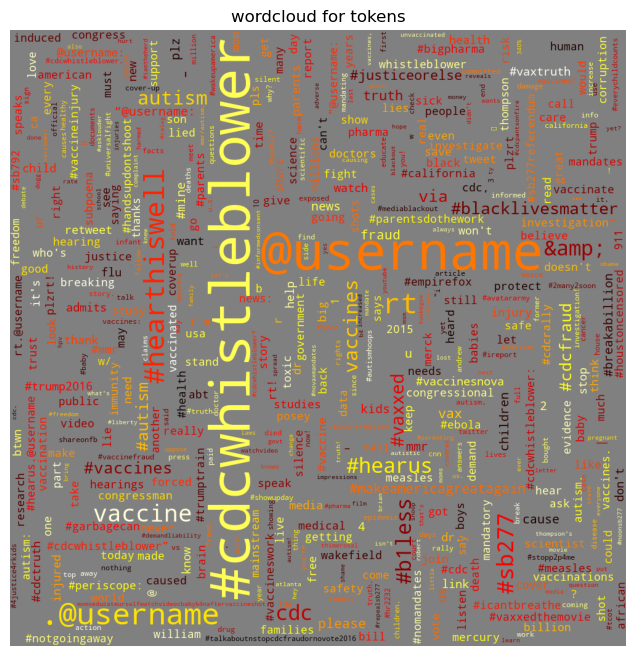

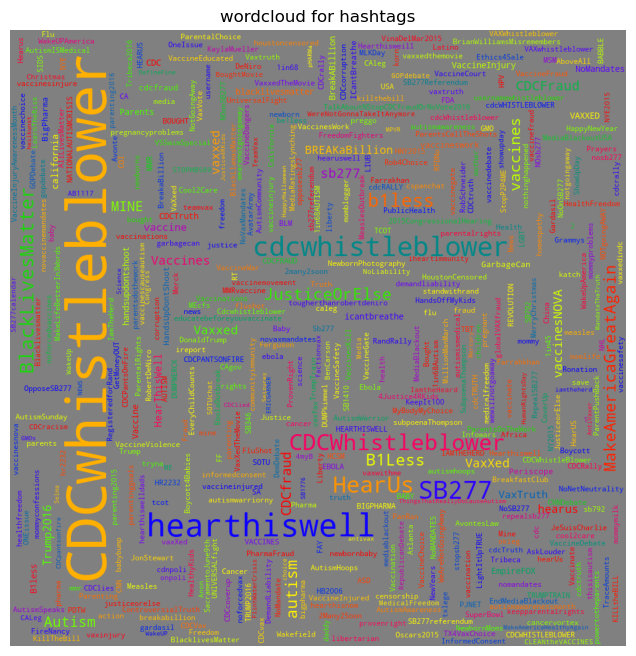

In [16]:
# wordcloud for the words in the clean tokens column which i created earlier, again using counter for frequencies
wc = WordCloud(width=1000, height=1000, prefer_horizontal=0.5, background_color="grey",max_font_size=90,max_words=500, colormap="hot",
               mode="RGBA").generate_from_frequencies(Counter(words))
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.title("wordcloud for tokens")
plt.axis("off")
plt.show

# wordcloud for hashtags
wc2 = WordCloud(width=1000, height=1000, prefer_horizontal=0.5, background_color="grey", max_font_size=90, max_words=500, colormap="prism",
                mode="RGBA").generate_from_frequencies(Counter(all_hashtags))
plt.figure(figsize=(8,8))
plt.imshow(wc2)
plt.title("wordcloud for hashtags")
plt.axis("off")
plt.show

***
# Part 3 - Application

Using the [Tkinter](https://docs.python.org/3/library/tkinter.html) library write the code for an application. This application is supposed to aid you in labelling texts according to their sentiment. For this you will need to implement certain functions into your app. Once your application is up an running sample 150 tweets from the CDCWhistleblower data set and label them using your app.<br>
Save your sample as .json file and be sure to include the tweet_id for each tweet so you are able to compare your labels with the ones you get from running VADER in task 4.<br>
Please use the original text for your labeling. After the preprocessing in task 2 it should not contain specific user mentions but only '@user', there should be no URLs left in the text, and #Hashtags should appear untouched in your texts.<br>

***Hint: Before you actually start coding, a great approach is to first of all start by conceptualizing your small app. Think about which functionalities you need to have and how these depend on and call each other. You can, as an example, refer to the extended Tkinter example we covered in the tutorial.***
If you like to, you can hand in your handwritten schema.

![Picture_of_schema](path_to_the_pic/pic.jpg) <-- **double click this cell to see how appending pictures with .ipynb files works. Make sure to hand in the png as well.**

## Task 3.1


In order for your application to work as intended follow the steps below. Note that this is no easy task! Work with other students, exchange ideas, or find help online but remember to only hand in code that you have written yourself!<br>

Implement the application as a class:<br>
- that takes 2 arguments: 'input_file' and 'output_file'
- that supports the method `load_data()` which loads the output_file and the input_file and removes tweets that are already classified aka. part of the output file. This is to ensure that you won't label the same text twice and that you will reach an end, once every text got labeled once. 
- with method `start_app()` that runs your application with a text box showing the content (text) of a tweet and 4 labeling buttons (Positive, Negative, Neutral, Undecidable) used to classify the content of each tweet
- with method `next_text()` that chooses a random tweet from the input data, displays it in the text box of the app and once the tweet has been classified, removes it from the pool of tweets still to be labeled<br>

Feel free to implement any other methods you deem necessary and do not forget to comment and explain your code!<br>

***Hint: There are many ways of solving this task! There is no 'one and only' solution so be bold and experiment with your ideas. You can probably make most of them work!***

In [17]:
subset = cdc_df[0:20] #just for testing

manual_label = pd.DataFrame(columns=["id","text","label"]) # empty df needed if its the first time running the app

In [18]:
# Your code
import tkinter as tk
import pandas as pd

class app:

    """
    Class app

    Parameters:
    ----------
    input_file_name: the name of the file where something should be labeled

    output_file_name: the name of the output file in which you get the id, text, and new label

    Methods:
    -------
    setup: is the core of the app needed to start the app

    load_data: loads the input and output data

    next_tweet: takes a random tweet from the dataset and drops it after it got labeled

    get_output: return the dataframe

    quit_app: quit everything also the python kernel

    start_app: tweets get labeled via the buttons on screen

    apply_sentiment: appends/concats a new row with label to the output dataframe for each tweet
    
    """

    def __init__(self, input_file_name, output_file_name, geometry='700x300'):
        self.input_file_name = input_file_name
        self.output_file_name = output_file_name
        self.geometry = geometry
    

    def load_data(self):
        self.input_file = pd.DataFrame(self.input_file_name)


        self.output_file = pd.DataFrame(self.output_file_name)

        #if one tweet_id is in the output_file, then it doesnt get to be in the input file
        self.input_file = self.input_file[self.input_file["id"].isin(self.output_file["id"]) == False]


    def next_tweet(self):

        self.get_started_button.destroy()

        random_row = self.input_file.sample(n=1).iloc[0] # take one random tweet

        self.tweet_text = random_row["text"] #assinging the text of the tweet to a variable
        self.tweet.config(text = f'{self.tweet_text}')

        self.random_row = random_row
        
        # if next_tweet is called the old tweet gets deleted from the input dataset which ensures that we dont label one tweet two times
        tweet_id = random_row["id"]
        i = self.input_file[(self.input_file["id"] == tweet_id)].index
        self.input_file = self.input_file.drop(i)

        self.label.config(text='What is the sentiment for this tweet?')

    def setup(self): # starting the app

        self.window = tk.Tk()
        self.window.title("manual sentiment analysis app")
        self.window.geometry(self.geometry)
        self.window.resizable(True, True)

        self.load_data() #calling the load data from above

        self.quit_button = tk.Button(self.window, text="quit app", command=self.quit_app) #button if you wanted to quit everything (also python) 
        self.quit_button.pack(side=tk.BOTTOM)

        self.tweet = tk.Label(self.window, text = '', wraplength=700, anchor= 'center')
        self.tweet.pack(side=tk.TOP, pady=10)

        self.label = tk.Label(self.window, text='Press "start sentiment analysis" to get a tweet')
        self.label.pack(side=tk.TOP, pady=10)

        self.get_started_button = tk.Button(self.window, text="start sentiment analysis", command= self.start_app)
        self.get_started_button.pack()

        self.get_output() # calls for the output of the tweet that got labelled

        self.window.mainloop()

    def quit_app(self): # function that stops everything
        self.window.destroy()
        exit()


    def start_app(self): #the actual app procedure
        
        self.get_started_button.destroy()


        button_frame = tk.Frame(self.window)
        button_frame.pack(side=tk.TOP, pady=10)
        
        def apply_sentiment(sentiment):
            self.random_row["label"] = sentiment # the sentiment of the butten gets added to our random row with which we are working
            new_row = pd.DataFrame([self.random_row[["id", "text", "label"]]]) # needs to be put in df to ensure the concatenating is working correctly
            self.output_file = pd.concat([self.output_file, new_row], ignore_index=False) # concate the new_row to the other/existing/labelled tweets

            self.next_tweet() # calls automatically for the next tweet

# buttons which when pressed call the function apply_sentiment
        negative = tk.Button(button_frame, text='negative', command=lambda: apply_sentiment('negative'))
        neutral = tk.Button(button_frame, text='neutral', command=lambda: apply_sentiment('neutral'))
        positive = tk.Button(button_frame, text='positive', command=lambda: apply_sentiment('positive'))
        undecidable = tk.Button(button_frame, text='undecidable', command=lambda: apply_sentiment('undecidable'))

        negative.pack(side=tk.LEFT, padx=5)
        neutral.pack(side=tk.LEFT, padx=5)
        positive.pack(side=tk.LEFT, padx=5)
        undecidable.pack(side=tk.LEFT, padx=5)
        

        output = tk.Button(self.window, text="get output file", command=self.get_output) #button which calls getoutput function
        output.pack(side=tk.BOTTOM, padx=10)

        self.next_tweet()

    def get_output(self):
        return self.output_file # returns us a nice dataframe with id text of the tweet and the new assigned label
    

In [ ]:
# testing and running the app with the subset
test = app(subset, manual_label)
test.setup()
manual_label = test.get_output()
manual_label

2024-12-22 13:56:51.472 python[60260:2196410] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-22 13:56:51.473 python[60260:2196410] +[IMKInputSession subclass]: chose IMKInputSession_Modern


,id,text,label
0,502960246844043265,@username Hearing anything about this:\n\n#CDC...,negative
3,502147406172262400,@username FIRE DR BOYLE!. Scores of kids w #A...,neutral
16,502223181252677632,#CDCWhistleBlower #ColeenBoyle,positive
10,501483115630850048,#CDCWhistleblower #MMR #Autism \n,undecidable
12,502281402159988736,#CDCWhistleBlower...,negative
14,502203021460115457,#CDCWhistleBlower Did you hear about the CDC d...,neutral
1,502230291226718208,Research! #CDC #CDCwhistleblower #autism #mmr ...,positive
2,502960408810889216,@username Nothing to say? #CDCwhistleblower #...,undecidable


## Task 3.2


Use your application to classify your sample of 150 tweets from the CDCWhisleblower data and save your result as 'manually_labeled_tweets.json'.<br>
Make sure you upload this labeled sample of tweets to your solutions repository!

In [20]:
# my 176 labeled tweets are also pushed to github, this is how i created the json file
with open('output.json', 'w') as f: #renamed to output so i dont overwrite my stored and labeled tweets
  json.dump(pd.DataFrame.to_dict(manual_label), f, ensure_ascii=False)

***
# Part 4 - Sentiment Analysis

In this last part of the assignment you will use the VADER sentiment analyzer to, well, analyze the sentiment of the CDCWhistleblower tweets.<br>
You can find a tutorial of how the nltk module's VADER analyzer works [here](https://www.nltk.org/howto/sentiment.html).<br>

## Task 4.1


Use the sentiment analyzer on the preprocessed original text column (the one without URLs, with @user, and #Hashtags) and save the resulting polarity score to a new column.

In [21]:
# Your code
classifier = SentimentIntensityAnalyzer()

# adding a new column with all the sentiment scores
cdc_df["sentiment"] = [classifier.polarity_scores(tweet) for tweet in cdc_df["text"]]
cdc_df["sentiment"]

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'comp...
4         {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...
                                ...                        
272655    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
272656    {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...
272657    {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...
272658    {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...
272659    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment, Length: 272660, dtype: object

## Task 4.2


Create another column containing the VADER sentiment label for each tweet. You can get the label (positive, negative, neutral) by checking the polarity scores you got in task 4.1. If the polarity score is smaller 0 (<0) the label should be 'negative', if it is larger 0 (>0) the label should be 'positive', and otherwise the label should be 'neutral'.<br>
What are the shares of 'positive', 'negative', and 'neutral' tweets? Visualize your findings.

In [22]:
# making a list for the comp scores
compound_score = [classifier.polarity_scores(tweet)["compound"] for tweet in cdc_df["text"]]

# labeling the tweets depending on their comp score
label_comp = []
for x in compound_score:
    if x < 0:
        label_comp.append("negative")
    elif x > 0:
        label_comp.append("positive")
    else:
        label_comp.append("neutral")

cdc_df["sentiment_label"] = label_comp

[Text(0, 0.5, 'share of sentiments in %'), Text(0.5, 0, 'sentiment_')]

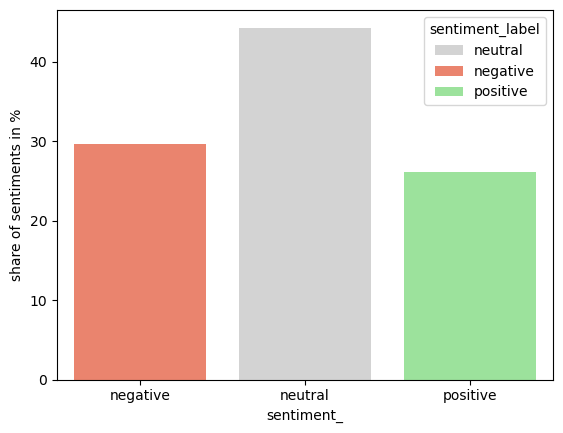

In [23]:
#calculating how many tweets got each label 
shares = pd.DataFrame(cdc_df["sentiment_label"].value_counts()/272606*100).reset_index()
shares

# simple barplot 
ax = sn.barplot(shares, y="count", x="sentiment_label", hue="sentiment_label", palette=["lightgrey", "#FF7659", "lightgreen"], legend=True, order=["negative", "neutral", "positive"])
ax.set(ylabel = "share of sentiments in %", xlabel = "sentiment_")

## Task 4.3



Match the 150 tweets you labeled manually with the labels you got from applying the VADER sentiment analyzer to the data. Visualize how VADER performed at analyzing the sentiment against your manual classifications of these 150 tweets.

[Text(0, 0.5, 'share of right/wrong labels in %'), Text(0.5, 0, 'performance')]

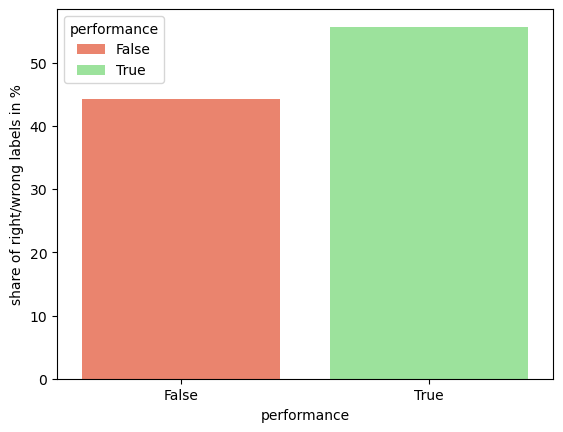

In [24]:
# Your code
manual_df = pd.read_json("manually_labeled_tweets.json")
comparison = pd.DataFrame.merge(manual_df, cdc_df[["id","sentiment_label"]], how="left")
comparison = comparison.rename(columns={"label":"manual_label","sentiment_label":"vader_label"})

# i am not sure how to visualize the performance
# thats why I assume my labeling is 100% correct (even if it isnt)
performance = []
for index, x in comparison.iterrows():
    if x["manual_label"] == x["vader_label"]:
        performance.append(True)
    else:
        performance.append(False)
comparison["performance"] = performance

# calculating the share of true and false labeling of the vader analysis
anteile = pd.DataFrame(comparison["performance"].value_counts()/176*100).reset_index()

# simple barplot
ay = sn.barplot(anteile,y="count", x="performance",hue="performance", palette=["#FF7659", "lightgreen"], legend=True)
ay.set(ylabel = "share of right/wrong labels in %", xlabel = "performance")